# In-Class Exercise on Spam Filtering  
In this exercise, we will use powerful tools such as pandas and sklearn to distinguish between spam and regular emails based on the information contained in the emails themselves.


## Download Data  
The data is downloaded using gdown into the same folder as the current file. After downloading, we unzip the received data.

In [81]:
#### YOUR CODE HERE ####
!gdown https://drive.google.com/uc?id=1bTJKchSInd3IgLs41b1_-Gd-T36a_pal -O spam_data.zip
!unzip -o spam_data.zip
#### END YOUR CODE #####

Downloading...
From: https://drive.google.com/uc?id=1bTJKchSInd3IgLs41b1_-Gd-T36a_pal
To: /content/spam_data.zip
100% 1.95M/1.95M [00:00<00:00, 138MB/s]
Archive:  spam_data.zip
  inflating: spam_ham_dataset.csv    


## Using Pandas for Storage  
Pandas is a commonly used library for storing data utilized in machine learning processes, offering functions suitable for large datasets and high performance. We read the data from the unzipped file into a `DataFrame`.


In [82]:
#### YOUR CODE HERE ####
import pandas as pd
import os

spam_data = pd.read_csv("spam_ham_dataset.csv", header=0)
print("Some sample about CSV:")
spam_data.head()
#### END YOUR CODE #####

Some sample about CSV:


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


Visualizing Data with 5 Examples

+ Example with 5 **Ham** Email

In [83]:
ham = spam_data[spam_data['label'] == 'ham']
random_ham_emails = ham.sample(n=5, random_state=42)
print("Some random Ham Emails:")
random_ham_emails

Some random Ham Emails:


,Unnamed: 0,label,text,label_num
2977,3444,ham,Subject: conoco - big cowboy\r\ndarren :\r\ni ...,0
3822,2982,ham,Subject: feb 01 prod : sale to teco gas proces...,0
2257,2711,ham,Subject: california energy crisis\r\ncaliforni...,0
2786,3116,ham,Subject: re : nom / actual volume for april 23...,0
4551,1314,ham,Subject: eastrans nomination changes effective...,0


+ Example with 5 **Spam** Email



In [84]:
spam = spam_data[spam_data['label'] == 'spam']
random_spam_emails = spam.sample(n=5, random_state=42)
print("Some random Spam Emails:")
random_spam_emails

Some random Spam Emails:


,Unnamed: 0,label,text,label_num
3927,5085,spam,"Subject: liffe is great\r\nhello ,\r\nvlsit ou...",1
4843,3806,spam,Subject: how cuold you do this to a firned ?\r...,1
1481,3993,spam,"Subject: decadent\r\nsoto , \\r\n_ 95 % 0 ff f...",1
1457,3875,spam,Subject: sugper viagrga is fabuklous\r\nonly r...,1
1589,4756,spam,Subject: did you notice ?\r\nnever agaln\r\nmi...,1


## Data Preprocessing  
As we can see, the current data contains Windows newline characters `\r\n`, which may cause confusion. To simplify, we replace them with spaces. You can also apply additional Pandas methods (e.g., removing the "Subject:" prefix, extracting the first line, etc.).


In [85]:
#### YOUR CODE HERE ####
def preprocess(df, text_column):

  # Replace Windows-style newlines with spaces
  df[text_column] = df[text_column].str.replace(r'\r\n', ' ', regex=True)

  # Lower

  df[text_column] = df[text_column].str.lower()

  # Remove "Subject:" prefix
  df[text_column] = df[text_column].str.replace(r'^subject:\s*', '', regex=True, n = 1)

  # Extract the first line of the email (optional)
  df[text_column] = df[text_column][1:] if df[text_column][0] == " " else df[text_column]



preprocess(spam_data,"text")
print("Some sample after preprocessing:")
spam_data.head()
#### END YOUR CODE #####

Some sample after preprocessing:


,Unnamed: 0,label,text,label_num
0,605,ham,enron methanol ; meter # : 988291 this is a fo...,0
1,2349,ham,"hpl nom for january 9 , 2001 ( see attached fi...",0
2,3624,ham,"neon retreat ho ho ho , we ' re around to that...",0
3,4685,spam,"photoshop , windows , office . cheap . main tr...",1
4,2030,ham,re : indian springs this deal is to book the t...,0


## Building Model  
First, we perform vectorization of the input data using `CountVectorizer`, aiming to convert text data into numerical representations. `CountVectorizer` creates a vocabulary of words appearing in the dataset and generates a corresponding vector for each sample, representing the word frequencies within that sample.


In [86]:
from sklearn.feature_extraction.text import CountVectorizer
#### YOUR CODE HERE ####
def vectorize_text(data, text_column='text'):
    vectorizer = CountVectorizer(min_df = 3, max_df = 0.95)
    X = vectorizer.fit_transform(data[text_column])

    return X, vectorizer

data_count, vectorizer = vectorize_text(spam_data,"text")
#### END YOUR CODE #####

**Next**, we apply the TF-IDF algorithm to the obtained vector. The output remains a sparse matrix but is now adjusted for the rarity of each word.


In [87]:
from sklearn.feature_extraction.text import TfidfTransformer
#### YOUR CODE HERE ####
def apply_tfidf(X):
    transformer = TfidfTransformer()
    X_tfidf = transformer.fit_transform(X)

    return X_tfidf, transformer


tf_idf_data, transformer = apply_tfidf(data_count)
#### END YOUR CODE #####

We can generate n-gram data using the `ngram_range` argument in `CountVectorizer`, allowing the program to capture commonly occurring n-word phrases in the dataset.  

Additionally, `CountVectorizer` and `TfidfTransformer` have a combined wrapper that integrates both processes into one while accepting their shared arguments: `TfidfVectorizer`.


In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
#### YOUR CODE HERE ####
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=3, max_df=0.95)
X_tfidf = tfidf_vectorizer.fit_transform(spam_data["text"])

#### END YOUR CODE #####

After completing the vectorization steps, we proceed to split the data into training and testing sets to evaluate the model's performance.








In [89]:
from sklearn.model_selection import train_test_split
#### YOUR CODE HERE ####
X_data = X_tfidf; y_data = spam_data["label_num"].values

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=0)
#### END YOUR CODE #####

Once we have the vectorized data, we use a Bayesian model to compute the results, such as `GaussianNB`. Other machine learning models can also be applied here (e.g., `LogisticRegression`, `SVM`).  

**Note:** The `todense()` function is used to convert a sparse matrix to a dense matrix, which may cause `MemoryError` for large datasets. Consider using models that support training with sparse matrices or implementing your own solution here.


In [90]:
from sklearn.naive_bayes import GaussianNB
import numpy
#### YOUR CODE HERE ####
X_train = numpy.asarray(X_train.todense())
model = GaussianNB()
model.fit(X_train, y_train)
#### END YOUR CODE #####

GaussianNB()

In [91]:
y_pred = model.predict(numpy.asarray(X_test.todense()))

## Metrics and Visualization  
To evaluate the model's performance, we can compute the F1 score or accuracy. In this case, we use the F1 score since the class distribution in the dataset is imbalanced (with 25% spam).  

Additionally, we can plot the ROC-AUC curve to visualize different cutoff points for the model.


In [92]:
from sklearn.metrics import f1_score, accuracy_score
#### YOUR CODE HERE ####
print("F1 Score: {:.4f}; Accuracy Score: {:.4f}".format(f1_score(y_pred, y_test), accuracy_score(y_pred, y_test)))
#### END YOUR CODE #####

F1 Score: 0.9481; Accuracy Score: 0.9710


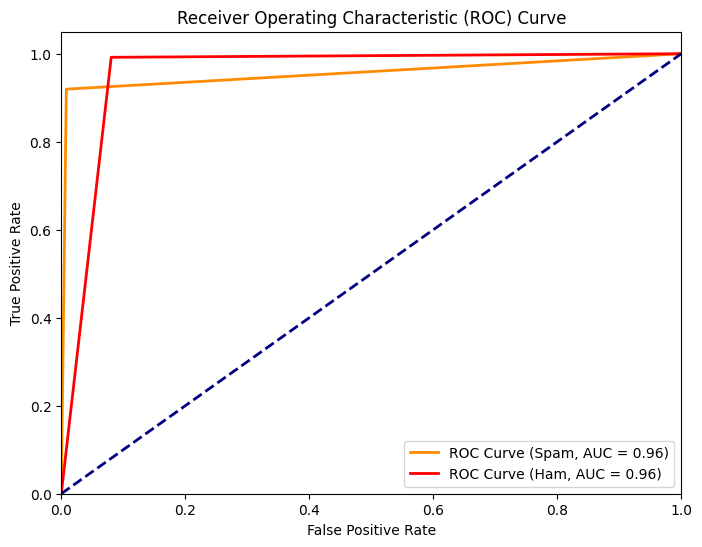

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict class probabilities
y_pred_proba = model.predict_proba(np.asarray(X_test.todense()))

# Compute ROC curve and AUC for spam (positive class)
fpr_spam, tpr_spam, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
roc_auc_spam = auc(fpr_spam, tpr_spam)

# Compute ROC curve and AUC for ham (negative class)
fpr_ham, tpr_ham, _ = roc_curve(y_test, y_pred_proba[:, 0], pos_label=0)
roc_auc_ham = auc(fpr_ham, tpr_ham)  # Fix: It should use fpr_ham, not fpr_spam

# Plot the ROC curves
plt.figure(figsize=(8, 6))
lw = 2  # Line width

# Plot ROC curve for spam
plt.plot(fpr_spam, tpr_spam, color='darkorange', lw=lw,
         label=f'ROC Curve (Spam, AUC = {roc_auc_spam:.2f})')

# Plot ROC curve for ham
plt.plot(fpr_ham, tpr_ham, color='red', lw=lw,
         label=f'ROC Curve (Ham, AUC = {roc_auc_ham:.2f})')

# Plot diagonal line (random guess)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Set axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Show the plot
plt.show()

## Alternative: Co-occurrence and TruncatedSVD  

In language, semantically related words (e.g., *doctor* and *patient*) often appear in the same context. Based on this idea, we can construct a co-occurrence matrix that captures word occurrences within sentences. This allows us to represent words in a shared vector space rather than relying on simple frequency counts.  

A co-occurrence matrix with a window spanning the entire sentence can be built using the existing `CountVectorizer` data or manually constructed.


In [95]:
#### YOUR CODE HERE ####
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

# Create a CountVectorizer to construct the co-occurrence matrix
vectorizer = CountVectorizer(stop_words='english', token_pattern=r'\b\w+\b')
X_counts = vectorizer.fit_transform(spam_data['text'])

# Apply TruncatedSVD (Latent Semantic Analysis)
n_components = 100  # Choose a number of components
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_lsa = svd.fit_transform(X_counts)

# Print explained variance ratio to check how much information is retained
explained_variance = svd.explained_variance_ratio_.sum()
print(f"Explained variance retained by {n_components} components: {explained_variance:.4f}")
#### END YOUR CODE #####

Explained variance retained by 100 components: 0.8500


## Alternative: HashingVectorizer  

For large datasets with a high vocabulary size, using `CountVectorizer` for vectorized data storage can be resource-intensive. An alternative approach is to use `HashingVectorizer`. Unlike `CountVectorizer`, which assigns a unique ID to each word/ngram, `HashingVectorizer` maps multiple words to the same ID using a hashing function.  

The choice between these two methods involves a trade-off between memory usage (e.g., RAM) and model quality. Adjusting the `n_features` parameter helps balance this trade-off to ensure that model performance does not degrade significantly.


In [96]:
#### YOUR CODE HERE ####
from sklearn.feature_extraction.text import TfidfTransformer, HashingVectorizer

hash_size = 2**14
hashed_data = HashingVectorizer(n_features=hash_size, ngram_range=(1, 3), stop_words='english').fit_transform(spam_data["text"])
hashed_matrix_data = TfidfTransformer().fit_transform(hashed_data)
#### END YOUR CODE #####

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

X_htrain, X_htest, y_htrain, y_htest = train_test_split(hashed_matrix_data, y_data, test_size=0.1, random_state=0)
model = GaussianNB()
model.fit(numpy.asarray(X_htrain.todense()), y_htrain)
y_hpred = model.predict(numpy.asarray(X_htest.todense()))
print("[HashedVectorizer] F1 Score: {:.4f}; Accuracy Score: {:.4f}".format(f1_score(y_hpred, y_htest), accuracy_score(y_hpred, y_htest)))

[HashedVectorizer] F1 Score: 0.8782; Accuracy Score: 0.9266


## Comparison and Analysis of Feature Extraction Methods  

# 1. Bag of Words (BoW)
How it works: Represents text as a frequency-based word matrix without considering the order.

**Dimensionality:** High, since each unique word becomes a feature.

**Interpretability:** Simple, as each feature corresponds to a word.

**Computational Cost:** Moderate to high, especially for large vocabularies.

**Performance:** Works well for simple tasks but ignores semantic relationships.

# 2. Term Frequency-Inverse Document Frequency (TF-IDF)
How it works: Enhances BoW by weighting words based on importance (rare words get higher weights).

**Dimensionality:** Same as BoW, but weighted features help reduce noise.

**Interpretability:** Clearer than LSA, as it maintains word association.

**Computational Cost:** Slightly higher than BoW due to additional weight calculations.

**Performance:** More effective in distinguishing important words, leading to better classification results.

# 3. Latent Semantic Analysis (LSA) via TruncatedSVD
How it works: Reduces the dimensionality of a co-occurrence matrix, capturing hidden relationships between words.

**Dimensionality:** Lower than BoW/TF-IDF, making models more efficient.

**Interpretability:** Harder to interpret, as features become abstract concepts rather than individual words.

**Computational Cost:** Higher due to matrix decomposition.

**Performance:** Often superior for capturing meaning and reducing redundancy, making it useful in topic modeling.

# Conclusion: Which One is Best?
For simple text classification tasks → **TF-IDF is a good balance of interpretability and performance.**

For capturing hidden meanings or reducing dimensionality → **LSA (Truncated SVD) is more effective.**

For quick, interpretable results in small datasets → **BoW is sufficient.**